# IMPORTING DATASETS

In [2]:
import numpy as np
import pandas as pd

In [3]:
df1 = pd.read_csv('aisles.csv')
df2 = pd.read_csv('products.csv')
df3 = pd.read_csv('departments.csv')
df4 = pd.read_csv('order_products__train.csv')
df5 = pd.read_csv('orders.csv')

In [4]:
# merging datasets to form complete dataset for analysis

df12 = pd.merge(df1, df2, how='inner', on='aisle_id')
df123 = pd.merge(df12, df3, how='inner', on='department_id')
df1234 = pd.merge(df4, df123, how='inner', on='product_id')
df12345 = pd.merge(df5, df1234, how='inner', on='order_id')

In [5]:
df12345

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,aisle,product_name,department_id,department
0,1187899,1,train,11,4,8,14.0,196,1,1,77,soft drinks,Soda,7,beverages
1,1187899,1,train,11,4,8,14.0,25133,2,1,21,packaged cheese,Organic String Cheese,16,dairy eggs
2,1187899,1,train,11,4,8,14.0,38928,3,1,120,yogurt,0% Greek Strained Yogurt,16,dairy eggs
3,1187899,1,train,11,4,8,14.0,26405,4,1,54,paper goods,XL Pick-A-Size Paper Towel Rolls,17,household
4,1187899,1,train,11,4,8,14.0,39657,5,1,45,candy chocolate,Milk Chocolate Almonds,19,snacks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384612,272231,206209,train,14,6,14,30.0,40603,4,0,75,laundry,Fabric Softener Sheets,17,household
1384613,272231,206209,train,14,6,14,30.0,15655,5,0,45,candy chocolate,Dark Chocolate Mint Snacking Chocolate,19,snacks
1384614,272231,206209,train,14,6,14,30.0,42606,6,0,37,ice cream ice,Phish Food Frozen Yogurt,1,frozen
1384615,272231,206209,train,14,6,14,30.0,37966,7,0,112,bread,French Baguette Bread,3,bakery


In [5]:
len(list(df12345['user_id'].unique()))

131209

In [6]:
# dropping unnecessary features
df = df12345.drop(columns=['order_id', 'eval_set', 'order_number', 'add_to_cart_order', 'aisle_id', 'aisle', 'department_id'])

In [7]:
df.head()

,user_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,reordered,product_name,department
0,1,4,8,14.0,196,1,Soda,beverages
1,1,4,8,14.0,25133,1,Organic String Cheese,dairy eggs
2,1,4,8,14.0,38928,1,0% Greek Strained Yogurt,dairy eggs
3,1,4,8,14.0,26405,1,XL Pick-A-Size Paper Towel Rolls,household
4,1,4,8,14.0,39657,1,Milk Chocolate Almonds,snacks


In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

user_id                   0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
reordered                 0
product_name              0
department                0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   user_id                 1384617 non-null  int64  
 1   order_dow               1384617 non-null  int64  
 2   order_hour_of_day       1384617 non-null  int64  
 3   days_since_prior_order  1384617 non-null  float64
 4   product_id              1384617 non-null  int64  
 5   reordered               1384617 non-null  int64  
 6   product_name            1384617 non-null  object 
 7   department              1384617 non-null  object 
dtypes: float64(1), int64(5), object(2)
memory usage: 84.5+ MB


In [11]:
df.describe()

,user_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,reordered
count,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06
mean,1.031128e+05,2.701392e+00,1.357759e+01,1.706613e+01,2.555624e+04,5.985944e-01
std,5.948715e+04,2.167646e+00,4.238458e+00,1.042642e+01,1.412127e+04,4.901829e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,5.173200e+04,1.000000e+00,1.000000e+01,7.000000e+00,1.338000e+04,0.000000e+00
50%,1.029330e+05,3.000000e+00,1.400000e+01,1.500000e+01,2.529800e+04,1.000000e+00
75%,1.549590e+05,5.000000e+00,1.700000e+01,3.000000e+01,3.794000e+04,1.000000e+00
max,2.062090e+05,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.000000e+00


In [12]:
df.nunique().sort_values()

reordered                      2
order_dow                      7
department                    21
order_hour_of_day             24
days_since_prior_order        31
product_id                 39123
product_name               39123
user_id                   131209
dtype: int64

# EXPLORATORY DATA ANALYSIS

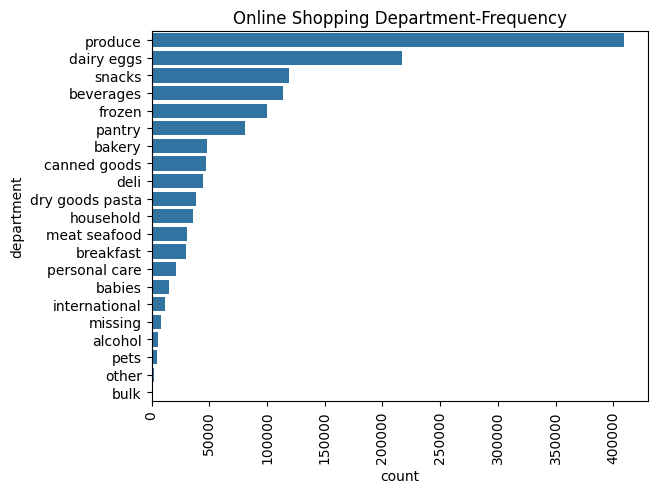

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(df.department, order=df['department'].value_counts().index)
plt.title('Online Shopping Department-Frequency')
plt.xticks(rotation=90)
plt.show()

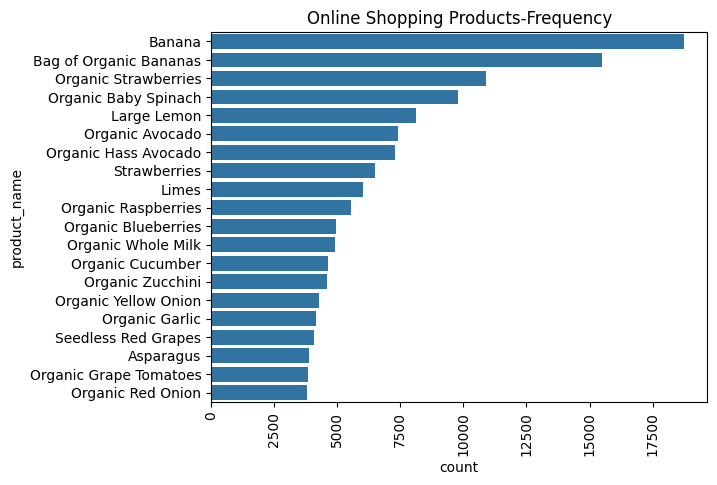

In [14]:
sns.countplot(df.product_name, order=df['product_name'].value_counts().index[:20])
plt.title('Online Shopping Products-Frequency')
plt.xticks(rotation=90)
plt.show()

In [15]:
df['product_name'].value_counts()

product_name
Banana                                             18726
Bag of Organic Bananas                             15480
Organic Strawberries                               10894
Organic Baby Spinach                                9784
Large Lemon                                         8135
                                                   ...  
Pregnancy Test, Test & Confirm                         1
Oatmeal & Almond Bar Soap                              1
Dark Chocolate Truffle Pig Bar                         1
Nourish Bowls Sesame Sriracha                          1
Organic Aromatherapeutic Moroccan Argan Oil Set        1
Name: count, Length: 39123, dtype: int64

In [16]:
df.isnull().sum()

user_id                   0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
reordered                 0
product_name              0
department                0
dtype: int64

# DATA PREPROCESSING

In [17]:
# encoding day and hour column so that we can count number of products bought in a particular interval by users 

dummies_df = pd.get_dummies(data=df, prefix=['Day','Hour'], columns=['order_dow','order_hour_of_day'])
dummies_df.head()

,user_id,days_since_prior_order,product_id,reordered,product_name,department,Day_0,Day_1,Day_2,Day_3,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,1,14.0,196,1,Soda,beverages,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,14.0,25133,1,Organic String Cheese,dairy eggs,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,14.0,38928,1,0% Greek Strained Yogurt,dairy eggs,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,14.0,26405,1,XL Pick-A-Size Paper Towel Rolls,household,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,14.0,39657,1,Milk Chocolate Almonds,snacks,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
map = {
    True: 1,
    False: 0
}
df = dummies_df.replace(map)
df.head()

C:\Users\HARSHIT\AppData\Local\Temp\ipykernel_11548\2835122045.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = dummies_df.replace(map)


,user_id,days_since_prior_order,product_id,reordered,product_name,department,Day_0,Day_1,Day_2,Day_3,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,1,14.0,196,1,Soda,beverages,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,14.0,25133,1,Organic String Cheese,dairy eggs,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,14.0,38928,1,0% Greek Strained Yogurt,dairy eggs,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,14.0,26405,1,XL Pick-A-Size Paper Towel Rolls,household,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,14.0,39657,1,Milk Chocolate Almonds,snacks,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# DATA MANIPULATION

In [19]:
# creating a dataset which contains information about the bought history of each user

data1 = df.groupby(['user_id']).agg({'days_since_prior_order':'mean',
                                     'reordered':'sum',
                                     'Day_0' :'sum',
                                     'Day_1':'sum',
                                     'Day_2':'sum',
                                     'Day_3':'sum',
                                     'Day_4':'sum',
                                     'Day_5':'sum',
                                     'Day_6':'sum',
                                     'Hour_0':'sum',
                                     'Hour_1':'sum',
                                     'Hour_2':'sum',
                                     'Hour_3':'sum',
                                     'Hour_4':'sum',
                                     'Hour_5':'sum',
                                     'Hour_6':'sum',
                                     'Hour_7':'sum',
                                     'Hour_8':'sum',
                                     'Hour_9':'sum',
                                     'Hour_10':'sum',
                                     'Hour_11':'sum',
                                     'Hour_12':'sum',
                                     'Hour_13':'sum',
                                     'Hour_14':'sum',
                                     'Hour_15':'sum',
                                     'Hour_16':'sum',
                                     'Hour_17':'sum',
                                     'Hour_18':'sum',
                                     'Hour_19':'sum',
                                     'Hour_20':'sum',
                                     'Hour_21':'sum',
                                     'Hour_22':'sum',
                                     'Hour_23':'sum'
                                    }).reset_index()

In [20]:
data1.head()

,user_id,days_since_prior_order,reordered,Day_0,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,1,14.0,10,0,0,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,30.0,12,0,31,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,6.0,4,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,6.0,8,0,0,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,10.0,4,0,18,0,0,0,0,0,...,18,0,0,0,0,0,0,0,0,0


In [21]:
data1['Total_orders_in_a_week'] = data1['Day_0']+data1['Day_1']+data1['Day_2']+data1['Day_3']+data1['Day_4']+data1['Day_5']+data1['Day_6']

In [22]:
data1

,user_id,days_since_prior_order,reordered,Day_0,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,...,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Total_orders_in_a_week
0,1,14.0,10,0,0,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,11
1,2,30.0,12,0,31,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,31
2,5,6.0,4,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,7,6.0,8,0,0,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,8,10.0,4,0,18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131204,206199,30.0,14,0,0,22,0,0,0,0,...,0,22,0,0,0,0,0,0,0,22
131205,206200,6.0,11,0,0,0,0,0,0,19,...,0,0,0,0,19,0,0,0,0,19
131206,206203,30.0,12,0,0,0,0,13,0,0,...,0,0,0,0,13,0,0,0,0,13
131207,206205,10.0,6,0,19,0,0,0,0,0,...,0,19,0,0,0,0,0,0,0,19


In [23]:
data1['Total_orders_in_a_week'].describe()

count    131209.000000
mean         10.552759
std           7.932847
min           1.000000
25%           5.000000
50%           9.000000
75%          14.000000
max          80.000000
Name: Total_orders_in_a_week, dtype: float64

In [26]:
# extracting inforamtion about only those users whose total orders in a week is more than 18, i.e. loyal customers:|

data1 = data1[data1['Total_orders_in_a_week']>18]

In [27]:
data1

,user_id,days_since_prior_order,reordered,Day_0,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,...,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Total_orders_in_a_week
1,2,30.0,12,0,31,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,31
5,9,30.0,22,0,0,0,0,0,0,22,...,0,0,0,0,0,0,0,0,0,22
19,38,30.0,10,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
22,43,26.0,20,0,0,0,0,0,33,0,...,0,0,0,0,0,0,0,0,0,33
33,59,10.0,12,21,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131182,206165,2.0,12,0,0,0,0,0,0,20,...,0,0,0,0,0,0,0,0,0,20
131199,206191,30.0,15,23,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,23
131204,206199,30.0,14,0,0,22,0,0,0,0,...,0,22,0,0,0,0,0,0,0,22
131205,206200,6.0,11,0,0,0,0,0,0,19,...,0,0,0,0,19,0,0,0,0,19


In [28]:
d = df[['user_id', 'reordered', 'product_id', 'product_name']]
d.head()

,user_id,reordered,product_id,product_name
0,1,1,196,Soda
1,1,1,25133,Organic String Cheese
2,1,1,38928,0% Greek Strained Yogurt
3,1,1,26405,XL Pick-A-Size Paper Towel Rolls
4,1,1,39657,Milk Chocolate Almonds


In [29]:
# extracting information of the products which are reordered maximum number of times

famous_prod = df.groupby('product_id')['reordered'].sum().reset_index().sort_values(by = 'reordered', ascending = False).head(50)
famous_product = list(famous_prod['product_id'].values)
famous_product

[24852,
 13176,
 21137,
 21903,
 47766,
 47209,
 47626,
 16797,
 27966,
 26209,
 27845,
 39275,
 45007,
 22935,
 24964,
 30391,
 4920,
 40706,
 44632,
 45066,
 4605,
 5876,
 42265,
 46979,
 8518,
 28204,
 43352,
 31717,
 19057,
 30489,
 5450,
 49235,
 37646,
 21616,
 28985,
 27086,
 26604,
 19660,
 27104,
 12341,
 24184,
 5077,
 39877,
 41950,
 49683,
 35951,
 48679,
 8424,
 43961,
 44359]

In [30]:
final_df = pd.merge(left = d, right = data1.drop(columns=['Total_orders_in_a_week']), on = 'user_id')
final_df

,user_id,reordered_x,product_id,product_name,days_since_prior_order,reordered_y,Day_0,Day_1,Day_2,Day_3,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,2,1,22963,Organic Roasted Turkey Breast,30.0,12,0,31,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,7963,Gluten Free Whole Grain Bread,30.0,12,0,31,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,16589,Plantain Chips,30.0,12,0,31,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1,32792,Chipotle Beef & Pork Realstick,30.0,12,0,31,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1,41787,Bartlett Pears,30.0,12,0,31,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484163,206205,0,42495,Pink Lady (Cripps) Apple,10.0,6,0,19,0,0,...,0,0,19,0,0,0,0,0,0,0
484164,206205,1,10181,Classic Guacamole,10.0,6,0,19,0,0,...,0,0,19,0,0,0,0,0,0,0
484165,206205,0,1158,Mango Chunks,10.0,6,0,19,0,0,...,0,0,19,0,0,0,0,0,0,0
484166,206205,0,29499,"Ghee, Original",10.0,6,0,19,0,0,...,0,0,19,0,0,0,0,0,0,0


In [31]:
# Pivot table whose elements contains the information about the number of times ith user ordered jth product

user_product_matrix = final_df.pivot_table(index='user_id', columns='product_id', values='reordered_x', fill_value=0)

In [32]:
user_product_matrix

product_id,1,2,3,4,8,10,11,12,18,21,...,49676,49677,49678,49679,49680,49681,49682,49683,49686,49688
user_id,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# creating columns for 7 days which will contain information about the number of products a particular user ordered in that particular day 

for day in ['Day_0', 'Day_1', 'Day_2', 'Day_3', 'Day_4', 'Day_5']:
    user_product_matrix[day] = final_df.groupby('user_id')[day].mean()

In [36]:
user_product_matrix

product_id,1,2,3,4,8,10,11,12,18,21,...,49682,49683,49686,49688,Day_0,Day_1,Day_2,Day_3,Day_4,Day_5
user_id,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0
43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0
59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0
206199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0


In [37]:
# creating columns for 24 hours which will contain information about the number of products a particular user ordered in that particular hour 

for hour in ['Hour_0', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23']:
    user_product_matrix[hour] = final_df.groupby('user_id')[hour].mean()

In [38]:
user_product_matrix

product_id,1,2,3,4,8,10,11,12,18,21,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
user_id,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
user_product_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19014 entries, 2 to 206205
Columns: 29386 entries, 1 to Hour_23
dtypes: float64(29386)
memory usage: 4.2 GB


In [40]:
for col in user_product_matrix.columns:
    user_product_matrix[col] = user_product_matrix[col].astype('float16')

In [41]:
user_product_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19014 entries, 2 to 206205
Columns: 29386 entries, 1 to Hour_23
dtypes: float16(29386)
memory usage: 1.0 GB


# SIMILARITY SCORE CALCULATION & RECOMMENDATION

In [42]:
from sklearn.metrics.pairwise import cosine_similarity

# calculating similarity scores between loyal users on the basis of their purchase history

user_similarity_score = cosine_similarity(user_product_matrix)

In [43]:
user_similarity_score

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.49638811],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.00191634,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.49437312],
       [0.        , 0.        , 0.00191634, ..., 0.        , 1.        ,
        0.0019216 ],
       [0.49638811, 0.        , 0.        , ..., 0.49437312, 0.0019216 ,
        1.        ]])

In [44]:
product = df2[['product_id', 'product_name']]
product

,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce
...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla"
49684,49685,En Croute Roast Hazelnut Cranberry
49685,49686,Artisan Baguette
49686,49687,Smartblend Healthy Metabolism Dry Cat Food


In [45]:
products = dict(zip(list(df.product_id), list(df.product_name)))
products

{196: 'Soda',
 25133: 'Organic String Cheese',
 38928: '0% Greek Strained Yogurt',
 26405: 'XL Pick-A-Size Paper Towel Rolls',
 39657: 'Milk Chocolate Almonds',
 10258: 'Pistachios',
 13032: 'Cinnamon Toast Crunch',
 26088: 'Aged White Cheddar Popcorn',
 27845: 'Organic Whole Milk',
 49235: 'Organic Half & Half',
 46149: 'Zero Calorie Cola',
 22963: 'Organic Roasted Turkey Breast',
 7963: 'Gluten Free Whole Grain Bread',
 16589: 'Plantain Chips',
 32792: 'Chipotle Beef & Pork Realstick',
 41787: 'Bartlett Pears',
 22825: "Organic D'Anjou Pears",
 13640: 'Asian Pears',
 24852: 'Banana',
 45066: 'Honeycrisp Apple',
 9387: 'Granny Smith Apples',
 5450: 'Small Hass Avocado',
 24838: 'Unsweetened Almondmilk',
 38547: 'Bubblegum Flavor Natural Chewing Gum',
 19019: 'Uncured Slow Cooked Ham',
 12007: 'Organic All Day Fresh Deodorant Lavender',
 26352: 'Chicken Caesar Salad',
 22559: 'Kitchen Cheese Enchilada',
 45613: 'Pad Thai',
 31883: 'Vegetable Lasagna',
 12324: 'Indian Paneer Tikka',
 33

In [46]:
import random

# function to recommend products

def recommend(user):

    if user in user_product_matrix.index:
        target_user = user
        prod_id = []
        
        similar_users=[]
        index = np.where(user_product_matrix.index == target_user)[0][0]
        similar = sorted(list(enumerate(user_similarity_score[index])),key=lambda x:x[1], reverse=True)[1:6]
        for i in similar:
            similar_users.append(i[0])
        
        # Recommend products from similar users
        for similar_user in similar_users:
            # Find products that similar user reordered but target user hasn't reordered
            user_products = (user_product_matrix.columns[
                (user_product_matrix.iloc[similar_user] > 0) & (user_product_matrix.iloc[target_user] == 0)
            ])
            prod_id.extend(list(user_products))
        
        recommended_products = prod_id
        
        recommendation = []
        for prod in recommended_products:
            if prod in products:
                recommendation.append(products[prod])
        
        print(random.sample(recommendation, k=6))

    else:
        print([products[x] for x in random.sample(famous_product, k=6)])

In [47]:
recommend(2)

['Small Hass Avocado', 'Gluten and Dairy Free Rice Macaroni and Cheeze', 'Organic Spring Mix Salad', 'Organic Reduced Fat 2% Milk', 'Lemon Lime Sparkling Seltzer Water', 'Sharp Cheddar Cheese']


In [44]:
recommend(14000000)

['Organic Yellow Onion', '100% Whole Wheat Bread', 'Strawberries', 'Spring Water', 'Organic Cucumber', 'Original Hummus']
